# Contents
* [Exploratory Analysis](#exp)
    * [Summary Statistics](#summ)
    * [Data Visualization](#viz)

# Exploratory Analysis <a class="anchor" id="exp"></a>

As a preliminary analysis, the data can be examined before making any assumptions. This can help in identifying any apparent errors or patterns present in the data. 

In [1]:
# IMPORT DEPENDENCIES 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [2]:
# READ DATA 
song_data = pd.read_csv('../Data/merged_finaltop100_revised.csv') 

# REMOVE ROWS WITH NULL VALUES 
song_data = song_data.dropna()
song_data.head()

Unnamed: 0                track_id                         artist_names  \
0           0  0yLdNVWF3Srea0uzk55zFn                          Miley Cyrus   
1           1  1Qrg8KqiBpW07V7PNxwwwL                                  SZA   
2           2  6AQbmUe0Qwf5PZnt4HmTXv            PinkPantheress, Ice Spice   
3           3  0WtM2NBVQNNJLh6scP13H8                   Rema, Selena Gomez   
4           4  2dHHgzDwk4BJdRwy9uXhTO  Metro Boomin, The Weeknd, 21 Savage   

                               track_name                              source  \
0                                 Flowers                            Columbia   
1                               Kill Bill  Top Dawg Entertainment/RCA Records   
2                      Boy's a liar Pt. 2                      Warner Records   
3           Calm Down (with Selena Gomez)       Mavin Records / Jonzing World   
4  Creepin' (with The Weeknd & 21 Savage)                    Republic Records   

   rank  weeks_on_chart  streams               country  danceability  ...  \
0     1               5   124198  United Arab Emirates         0.707  ...   
1     2              10   106927  United Arab Emirates         0.644  ...   
2     3               2    83627  United Arab Emirates         0.696  ...   
3     4              25    79714  United Arab Emirates         0.801  ...   
4     5              11    79488  United Arab Emirates         0.715  ...   

   duration_ms  time_signature  album_release_date  \
0     200455.0             4.0          2023-01-13   
1     153947.0             4.0          2022-12-08   
2     131013.0             4.0          2023-02-03   
3     239318.0             4.0          2022-08-25   
4     221520.0             4.0          2022-12-02   

                                              lyrics  \
0  We were good, we were gold\nKinda dream that c...   
1  I'm still a fan even though I was salty\nHate ...   
2  Take a look inside your heart\nIs there any ro...   
3  Vibez\nOh, no\nAnother banger\nBaby, calm down...   
4  Ooh, ooh-ooh\nOoh-ooh-ooh, ooh, ooh-ooh (Just ...   

                                        lyrics_trans  continent  iso_alpha3  \
0  we were good we were gold kinda dream that can...       Asia         ARE   
1  im still a fan even though i was salty hate to...       Asia         ARE   
2  take a look inside your heart is there any roo...       Asia         ARE   
3  vibez oh no another banger baby calm down calm...       Asia         ARE   
4  ooh oohooh oohoohooh ooh oohooh just cant beli...       Asia         ARE   

   len_words_orig  len_words_trans  \
0             334              334   
1             362              362   
2             372              372   
3             495              495   
4             458              456   

                                        lyrics_clean  
0  good gold dream sell right til build home watc...  
1  fan even though salty hate see broad know happ...  
2  take look inside heart room room would hold br...  
3  another banger baby calm calm girl body put he...  
4  believe man want somebody say saw person kiss ...  

[5 rows x 30 columns]

## Summary Statistics <a class="anchor" id="summ"></a>

In [3]:
# SUMMARY STATISTICS 
song_data.iloc[:, 7:].describe() #summary for quantitative features 

streams  danceability       energy          key     loudness  \
count  6.809000e+03   6809.000000  6809.000000  6809.000000  6809.000000   
mean   4.645751e+05      0.686711     0.648354     5.252460    -6.359081   
std    1.004412e+06      0.134797     0.151325     3.609155     2.401002   
min    4.899000e+03      0.210000     0.034900     0.000000   -20.617000   
25%    4.968300e+04      0.593000     0.545000     2.000000    -7.665000   
50%    1.070540e+05      0.700000     0.662000     5.000000    -5.983000   
75%    4.436090e+05      0.789000     0.754000     8.000000    -4.727000   
max    1.608968e+07      0.981000     0.996000    11.000000     0.963000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  6809.000000  6809.000000   6809.000000       6809.000000  6809.000000   
mean      0.524012     0.104867      0.256297          0.017564     0.167459   
std       0.499460     0.095804      0.239559          0.092202     0.117771   
min       0.000000     0.023200      0.000008          0.000000     0.017800   
25%       0.000000     0.042500      0.062800          0.000000     0.093400   
50%       1.000000     0.063600      0.171000          0.000003     0.122000   
75%       1.000000     0.131000      0.391000          0.000132     0.210000   
max       1.000000     0.862000      0.983000          0.957000     0.960000   

           valence        tempo    duration_ms  time_signature  \
count  6809.000000  6809.000000    6809.000000     6809.000000   
mean      0.517240   122.470919  196034.198561        3.953885   
std       0.220002    28.362855   46454.632618        0.279415   
min       0.034200    60.001000   60000.000000        1.000000   
25%       0.346000    98.035000  163886.000000        4.000000   
50%       0.514000   119.985000  192000.000000        4.000000   
75%       0.680000   139.981000  224427.000000        4.000000   
max       0.978000   235.815000  620696.000000        5.000000   

       len_words_orig  len_words_trans  
count     6809.000000      6809.000000  
mean       367.341754       397.202967  
std        169.962184       167.235124  
min          4.000000         4.000000  
25%        269.000000       289.000000  
50%        348.000000       367.000000  
75%        449.000000       474.000000  
max       3071.000000      3048.000000

In [4]:
# AVERAGE AUDIO FEATURES BY COUNTRY 
feats_mean_country = song_data.groupby('country')[['streams', 'valence', 'mode', 'loudness', 
                'acousticness', 'tempo', 'energy', 'liveness', 
                'key', 'duration_ms', 'instrumentalness', 'danceability', 
                'speechiness',  'len_words_orig', 'len_words_trans']].mean().reset_index() #summary by continent
feats_mean_country

country       streams   valence      mode  loudness  \
0              Argentina  1.179263e+06  0.625626  0.404040 -5.361980   
1              Australia  6.192648e+05  0.496356  0.620000 -6.315040   
2                Austria  8.770041e+04  0.543645  0.474747 -6.254061   
3                Belarus  2.909776e+04  0.447598  0.484211 -6.879421   
4                Belgium  1.371359e+05  0.508441  0.600000 -6.345560   
..                   ...           ...       ...       ...       ...   
68  United Arab Emirates  3.221250e+04  0.459147  0.666667 -6.503958   
69        United Kingdom  9.593073e+05  0.507231  0.642857 -6.410847   
70               Uruguay  8.442847e+04  0.608344  0.437500 -5.203010   
71             Venezuela  5.352543e+04  0.551919  0.454545 -5.111434   
72               Vietnam  1.848383e+05  0.442502  0.684783 -8.073359   

    acousticness       tempo    energy  liveness       key    duration_ms  \
0       0.237290  112.951848  0.664677  0.181675  5.444444  187128.434343   
1       0.221503  125.277250  0.664310  0.159586  4.940000  199312.920000   
2       0.213266  123.259626  0.685020  0.181289  5.343434  183957.303030   
3       0.208271  125.379137  0.670958  0.201082  4.600000  158243.378947   
4       0.262591  125.294170  0.645270  0.151885  5.040000  197440.200000   
..           ...         ...       ...       ...       ...            ...   
68      0.282520  123.080115  0.625021  0.163030  5.395833  197423.093750   
69      0.223069  125.682122  0.653378  0.149428  5.214286  201593.744898   
70      0.230471  112.094948  0.664927  0.182758  5.302083  182995.281250   
71      0.241461  122.753202  0.687758  0.166743  4.727273  197992.878788   
72      0.543023  127.640761  0.517070  0.149307  4.913043  226810.815217   

    instrumentalness  danceability  speechiness  len_words_orig  \
0           0.008968      0.751545     0.117749      413.797980   
1           0.020464      0.649480     0.080443      375.850000   
2           0.014873      0.708828     0.106137      413.343434   
3           0.044603      0.692832     0.133614      301.589474   
4           0.017074      0.662280     0.089938      381.740000   
..               ...           ...          ...             ...   
68          0.019190      0.629760     0.072226      366.343750   
69          0.013729      0.643010     0.098102      394.806122   
70          0.009368      0.757583     0.126501      423.958333   
71          0.010564      0.747020     0.116214      414.949495   
72          0.011024      0.659815     0.063158      404.119565   

    len_words_trans  
0        451.151515  
1        377.470000  
2        420.575758  
3        337.631579  
4        389.690000  
..              ...  
68       366.916667  
69       394.357143  
70       461.500000  
71       454.151515  
72       379.152174  

[73 rows x 16 columns]

In [5]:
# AVERAGE AUDIO FEATURES BY COUNTRY 
pd.options.plotting.backend = "plotly"
feats_mean_country.plot.barh(y='country', x=['streams', 'valence', 'mode', 'loudness', 
                'acousticness', 'tempo', 'energy', 'liveness', 
                'key', 'duration_ms', 'instrumentalness', 'danceability', 
                'speechiness', 'len_words_orig', 'len_words_trans'],
                 title = 'Average audio features by country', template = 'plotly_dark')

*Figure 1.1*

According to Figure 1.1, there are significant variations in the averages of several quantitative features, including streams, mode, acousticness, instrumentalness, and speechiness, across 73 countries in six continents. For instance, Brazil exhibits a considerably higher average liveness in comparison to others.

In [6]:
# SUMMARY FOR QUALITATIVE FEATURES 
song_data[['track_id','artist_names', 'track_name', 'source', 'country','album_release_date', 'lyrics']].describe() 

track_id artist_names track_name    source country  \
count                     6809         6809       6809      6809    6809   
unique                    2864         2116       2830      1202      73   
top     0yLdNVWF3Srea0uzk55zFn    Bad Bunny    Flowers  Columbia   Italy   
freq                        70          140         70       340     100   

       album_release_date                                             lyrics  
count                6809                                               6809  
unique                828                                               2858  
top            2023-01-27  We were good, we were gold\nKinda dream that c...  
freq                  205                                                 70

## Data Visualization  <a class="anchor" id="viz"></a>

#### Number of streams of top 1 song

In [7]:
# PLOT STREAMS FOR TOP 1 SONG IN 73 COUNTRIES 
df = song_data.loc[song_data['rank']==1] #get rank 1 songs 
fig = px.scatter_geo(df, locations='iso_alpha3', color="track_name",
                     hover_name="country", size="streams", 
                     title='Streams of Top 1 Songs' )
fig.update_geos(
    showcoastlines=True, coastlinecolor="white",
    showocean=True, oceancolor="black",
)
fig.update_layout(legend_title = "Top 1 Songs")
fig.show()

*Figure 1.2*

Brazil, Mexico, USA, and Italy have the highest streams for their top 1 songs. 

In [8]:
# EXPORT PLOT 
pio.write_html(fig, file='../Analysis/Plots/Top1Streams.html', auto_open=True)

#### Correlation Matrix of Audio Features and Streams

C:\Users\kayan\AppData\Local\Temp\ipykernel_4760\1686967092.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



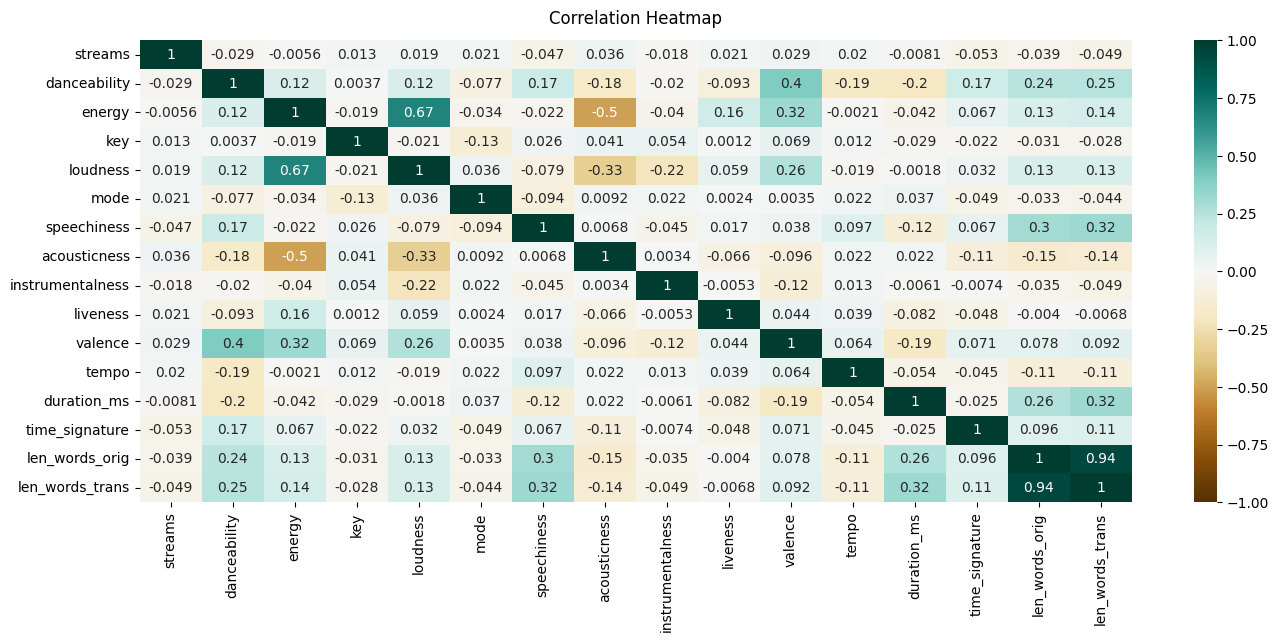

In [9]:
# PLOT CORRELATIONS 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(song_data.iloc[:, 7:].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../Analysis/Plots/Heatmap1.png', dpi=300, bbox_inches='tight'); 

*Figure 1.3*

Valence and danceability have the highest positive correlations while acousticness and energy have the weakest correlation. 

C:\Users\kayan\AppData\Local\Temp\ipykernel_4760\745660606.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



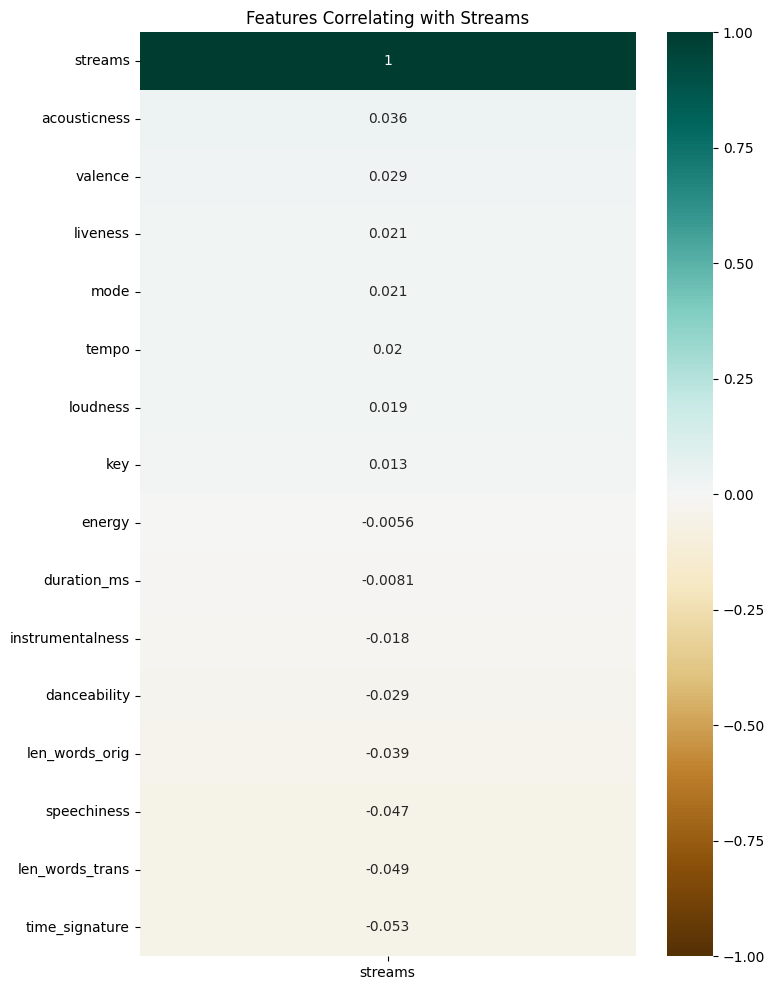

In [10]:
# PLOT CORRELATIONS 
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(song_data.iloc[:, 7:].corr()[['streams']].sort_values(by='streams', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2.set_title('Features Correlating with Streams', fontdict={'fontsize':12}, pad=6)
plt.savefig('../Analysis/Plots/Heatmap2.png', dpi=300, bbox_inches='tight')

*Figure 1.4*

The correlation between popularity, as measured by the number of streams, and the quantitative features appears to be very weak. This indicates that changes in these variables are unlikely to significantly influence the number of streams. Nonetheless, this weak correlation does not rule out the possibility of predictive power between the variables, as there could be non-linear relationships that have not been observed. 

#### Most popular words in top songs in different countries 

In [11]:
# JOIN CLEANED LYRICS FOR EACH COUNTRY 
lyrics_joined = song_data.dropna(subset=['lyrics_clean', 'continent'])
lyrics_joined = lyrics_joined.groupby('country')['lyrics_clean'].apply(' '.join).reset_index()
lyrics_joined = pd.merge(lyrics_joined, song_data[['country', 'continent']].drop_duplicates(), on='country', how='inner')
lyrics_joined

country                                       lyrics_clean  \
0              Argentina  come back want get hurt lose count forgive dre...   
1              Australia  good gold dream sell right til build home watc...   
2                Austria  good gold dream sell right til build home watc...   
3                Belarus  generally want want implant call doctor love h...   
4                Belgium  good gold dream sell right til build home watc...   
..                   ...                                                ...   
68  United Arab Emirates  good gold dream sell right til build home watc...   
69        United Kingdom  good gold dream sell right til build home watc...   
70               Uruguay  will oversize fit combine well dance see cat e...   
71             Venezuela  let see tell go street today baby case think w...   
72               Vietnam  universe want want put first universe night li...   

        continent  
0   South America  
1         Oceania  
2          Europe  
3          Europe  
4          Europe  
..            ...  
68           Asia  
69         Europe  
70  South America  
71  South America  
72           Asia  

[73 rows x 3 columns]

**Most popular word for each country**

In [12]:
def mostfreq_word(text):
    '''get most frequent word'''
    words_list = text.split() #tokenize the text
    word_counts = Counter(words_list) #count frequency of each word
    return word_counts.most_common(2),  #return most frequent word

In [13]:
# GET MOST FREQUENT WORD 
most_frequent = lyrics_joined['lyrics_clean'].apply(mostfreq_word)
lyrics_joined['most_frequent_word'] = [i[0][0][0]for i in most_frequent]
lyrics_joined['most_frequent_cnt'] = [i[0][0][1]for i in most_frequent]

In [14]:
# PLOT MOST FREQUENT WORD 
fig1 = px.scatter(lyrics_joined, y="country", x="most_frequent_cnt", color="continent", text="most_frequent_word")
fig1.update_traces(textposition='top center')
fig1.update_layout(height=700, title_text='Most Frequent Word',template = 'plotly_dark')
fig1.show()

*Figure 1.5*

The most frequent words in lyrics of popular songs in different regions appears very similar. 

#### Most common words in popular songs 

In [15]:
# PRINT TOTAL NUMBER OF WORDS IN COMBINED LYRICS 
text = ' '.join(song_data['lyrics_clean']) #join cleaned lyrics 
ls = text.split(' ')
len(ls)

1045530

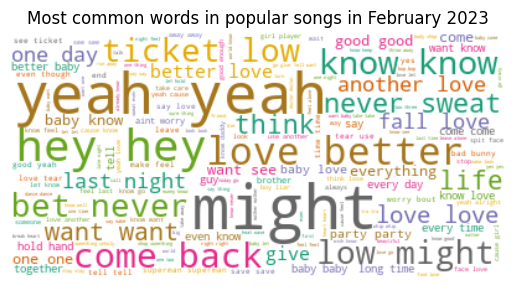

In [16]:
# MOST COMMON WORDS IN POPULAR SONGS 
wordcloud = WordCloud( background_color = 'white', colormap="Dark2").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in popular songs in February 2023')
plt.show()

*Figure 1.6*

Typically, modern song lyrics include certain words that are associated with contemporary themes. For instance, the prevalent themes in new-age songs usually revolve around words like "party" and "love" as shown in this wordcloud. 

In [17]:
# JOIN LYRICS BY CONTINENT 
joined_lyrics = song_data.dropna(subset=['lyrics_clean'])
joined_lyrics = joined_lyrics.groupby('continent')['lyrics_clean'].apply(' '.join).reset_index()

In [18]:
# COMPUTE WORD FREQUENCIES 
vec = CountVectorizer(tokenizer = nltk.word_tokenize)
freq = vec.fit_transform(joined_lyrics['lyrics_clean'])
feat_names = vec.get_feature_names_out()

C:\Users\kayan\Anaconda3\envs\py310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [19]:
# CONVERT WORD FREQUENCIES TO DATAFRAME 
df1 = pd.DataFrame(freq.todense(),columns=feat_names).transpose()
df1.reset_index(inplace=True)
df1 = df1.rename(columns = {'index':'token', 0: 'Africa', 
                            1: 'Asia', 2: 'Europe', 3:'North America', 
                            4:'Oceania', 5: 'South America'})
df1

token  Africa  Asia  Europe  North America  Oceania  South America
0        abandon       0     6       1             13        0             20
1          abbot       0     0       0              0        0              2
2        abdomen       0     0       0             11        0              6
3      abdominal       0     0       1              0        0              0
4      abduction       0     1       1              0        0              0
...          ...     ...   ...     ...            ...      ...            ...
11000     zombie       2    11       3              0        3              3
11001       zone       8    19      56              9        2              8
11002        zoo       1     1       3              0        0              0
11003       zoom       0     1      11              0        0              0
11004      zorro       0     1       2             16        0             10

[11005 rows x 7 columns]

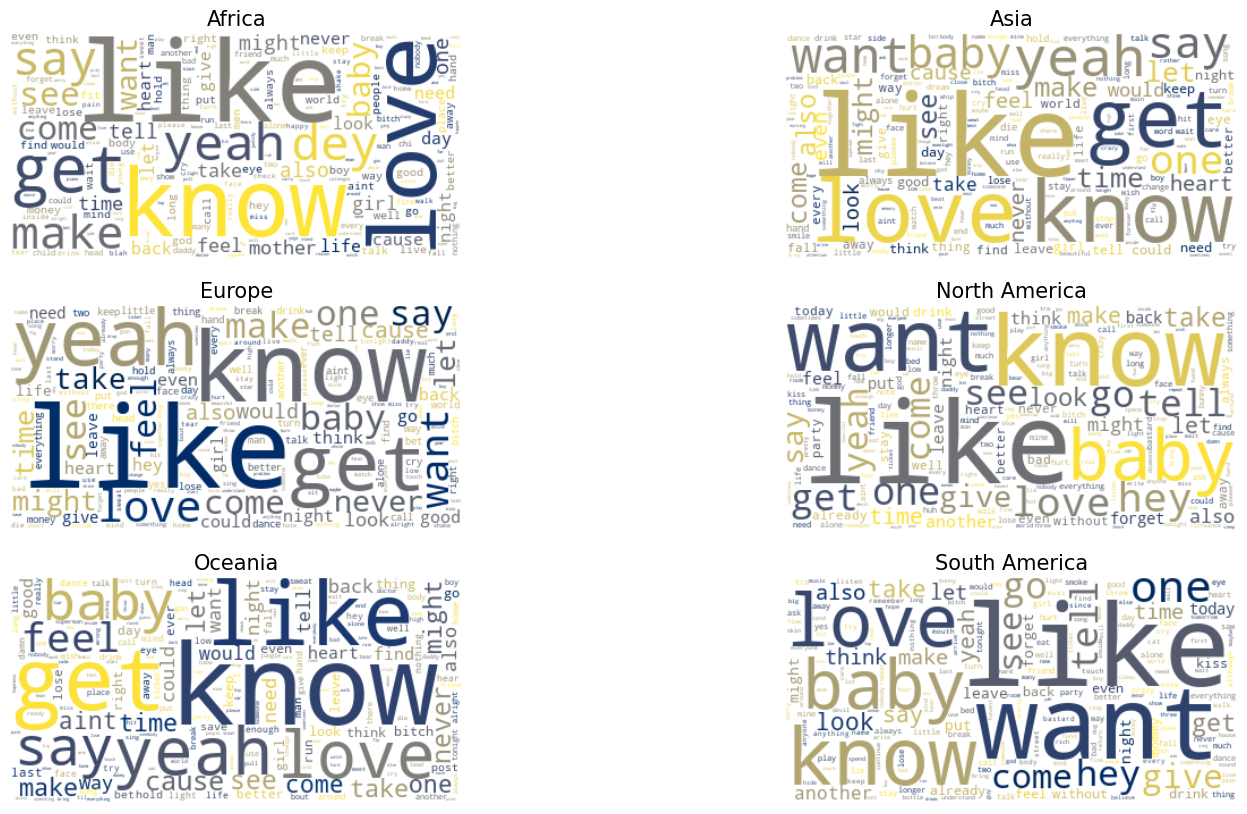

In [20]:
# MOST FREQUENT WORDS BY CONTINENT 
def plot_wordcloud(df,row,col):
    wc = WordCloud(background_color="white",colormap="cividis",
                 max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
    for index, value in enumerate(df.columns[1:]):
        top_dict = dict(zip(df['token'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
    
    plt.subplots_adjust(wspace=0, hspace=0.2)
    plt.show()
    
plot_wordcloud(df1,3,2) #plot wordcloud 

*Figure 1.7*

The top words in popular songs across various regions seem to be similar, with frequently used words being simple and commonly used. However, it is worth noting that the lyrics used to create these word clouds have undergone preprocessing, and some commonly used words like "hey" and "yeah" were not successfuly eliminated using nltk stopwords.

### Frequency distribution for tokens

In [21]:
# GET FREQUENCY DISTRIBUTIONS FOR TOKENS 
d = nltk.FreqDist(w for w in ls if w.isalnum())
d

FreqDist({'like': 27075, 'know': 19940, 'love': 16436, 'get': 15532, 'want': 14420, 'yeah': 14368, 'baby': 12024, 'one': 10552, 'see': 10256, 'say': 9874, ...})

In [22]:
# SORT FREQUENCIES 
sorted_d = dict(sorted(d.items(), key=lambda x: x[1], reverse=True)) #sort dict descending 
print(sorted_d)

{'like': 27075, 'know': 19940, 'love': 16436, 'get': 15532, 'want': 14420, 'yeah': 14368, 'baby': 12024, 'one': 10552, 'see': 10256, 'say': 9874, 'come': 9629, 'make': 8797, 'tell': 8594, 'take': 8104, 'let': 7988, 'time': 7914, 'might': 7779, 'feel': 7626, 'go': 7543, 'hey': 7456, 'also': 7310, 'look': 7187, 'never': 6977, 'give': 6534, 'night': 6160, 'would': 5910, 'think': 5910, 'back': 5688, 'cause': 5676, 'even': 5506, 'heart': 5335, 'leave': 4953, 'good': 4647, 'girl': 4162, 'need': 4116, 'day': 4089, 'could': 4070, 'life': 4062, 'put': 3819, 'another': 3815, 'way': 3720, 'better': 3642, 'thing': 3631, 'keep': 3434, 'away': 3299, 'always': 3281, 'everything': 3272, 'drink': 3185, 'lose': 3135, 'bitch': 3127, 'stay': 3096, 'well': 3070, 'little': 3049, 'find': 3046, 'call': 3043, 'break': 3001, 'dance': 2938, 'eye': 2930, 'forget': 2917, 'without': 2828, 'today': 2798, 'fall': 2774, 'hand': 2770, 'right': 2726, 'alone': 2692, 'talk': 2578, 'world': 2496, 'every': 2493, 'money': 24

In [23]:
# TOP 20 MOST FREQUENT 
top_20 = list(sorted_d.items())[:20] #get 20 key-val pairs from dict
top_20 = dict(top_20) # Convert the list to a dictionary
print(top_20)

{'like': 27075, 'know': 19940, 'love': 16436, 'get': 15532, 'want': 14420, 'yeah': 14368, 'baby': 12024, 'one': 10552, 'see': 10256, 'say': 9874, 'come': 9629, 'make': 8797, 'tell': 8594, 'take': 8104, 'let': 7988, 'time': 7914, 'might': 7779, 'feel': 7626, 'go': 7543, 'hey': 7456}


In [24]:
# PLOT TOP 20 TOKENS 
d = pd.DataFrame(top_20.items(), columns=['word', 'count']) 
fig = px.bar(d.sort_values(by='count', ascending=True), y='word', x='count')
fig.update_layout(title = 'Frequency of top 20 words', template = 'plotly_dark')

*Figure 1.8*

In [25]:
# PLOT TOP 50 TOKENS 
top_50 = list(sorted_d.items())[:50] 
top_50 = dict(top_50) 
d = pd.DataFrame(top_50.items(), columns=['word', 'count']) 
fig = px.bar(d.sort_values(by='count', ascending=True), y='word', x='count')
fig.update_layout(title = 'Frequency of top 50 words', template = 'plotly_dark')

*Figure 1.9*

After analyzing the lyrics data, it is evident that the predominant theme of the popular hits in February 2023 is centered around the topic of love. This finding is not surprising, as Valentine's Day also falls within the same month.